# Explore here

In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings

# Configuración para ignorar advertencias
def advertencias(*args, **kwargs):
    pass

warnings.warn = advertencias
warnings.filterwarnings("ignore", category=FutureWarning)

# Cargar el conjunto de datos
ruta_datos = '/workspaces/myfirstML/data/raw/bank-marketing-campaign-data.csv'
datos = pd.read_csv(ruta_datos, delimiter=';')

# Mostrar una vista rápida de los datos
datos_vista_rapida = datos.head()
datos_vista_rapida

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploración y limpieza de datos

FEATURES:
age ,job, marital, education , default , housing ,loan ,contact ,month ,day_of_week ,duration ,campaign ,pdays ,previous ,poutcome ,emp.var.rate ,cons.price.idx ,cons.conf.idx ,euribor3m ,nr.employed 

In [6]:
# Comprensión de las características
# Revisar el número de filas y columnas
print(f"Nuestro conjunto de datos contiene {len(datos)} filas y {datos.shape[1]} características.")

datos.info()  # Esto muestra tipos de datos, número de valores no nulos, etc.


Nuestro conjunto de datos contiene 41188 filas y 21 características.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.pr

In [7]:
# Identificación de valores faltantes
valores_faltantes = datos.isna().sum()[datos.isna().sum() > 0]

# Mostrar el resultado
if valores_faltantes.empty:
    print("No hay valores faltantes en el conjunto de datos.")
else:
    print("Valores faltantes encontrados:")
    print(valores_faltantes)

# Eliminar las columnas 'month' y 'day_of_week'
datos.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)

# Mostrar las primeras 3 filas para verificar el cambio
datos.head(3)


No hay valores faltantes en el conjunto de datos.


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Análisis de datos (EDA)

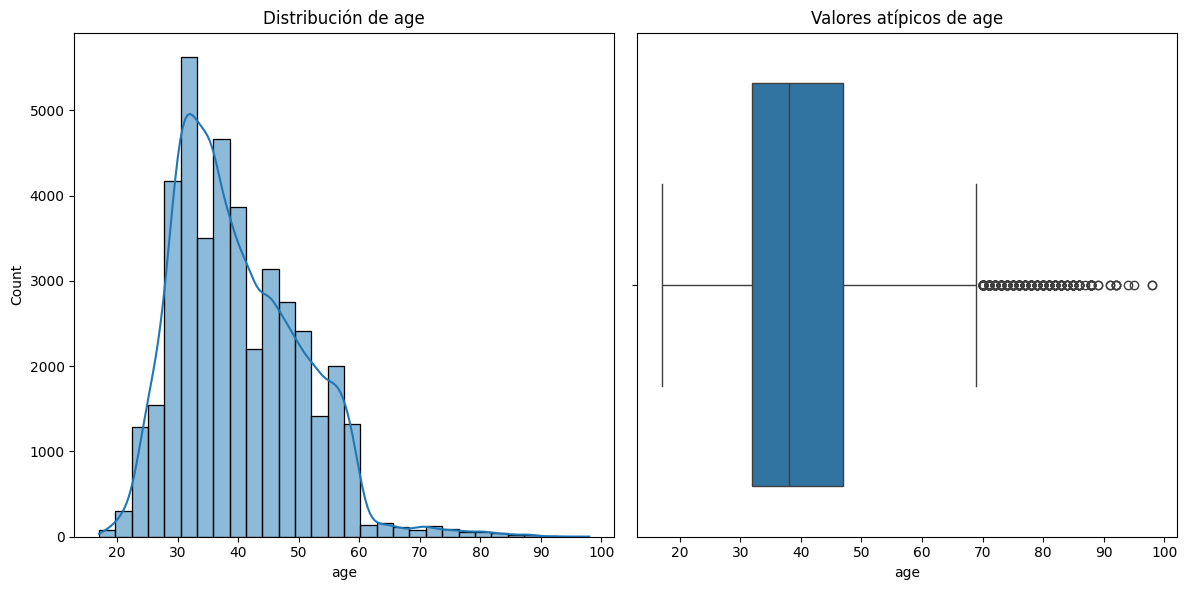

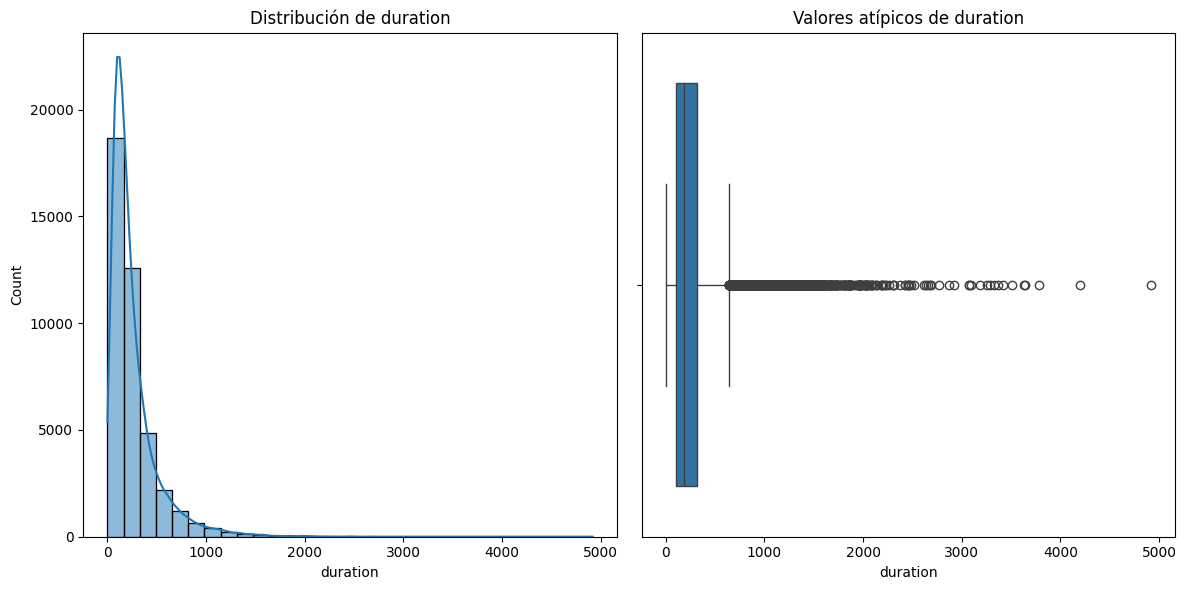

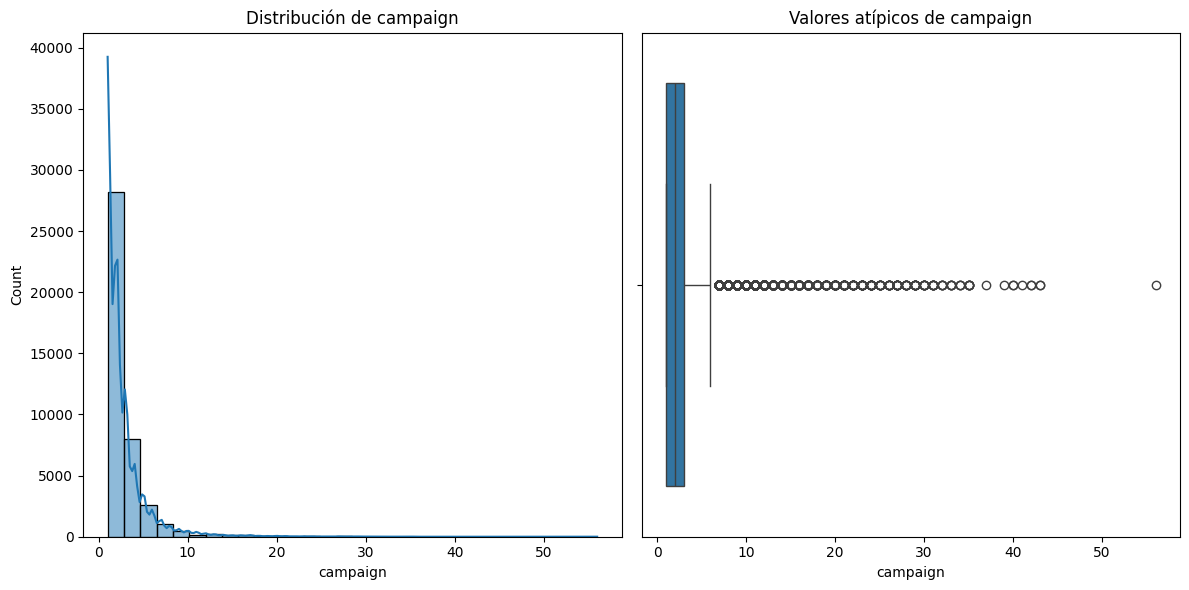

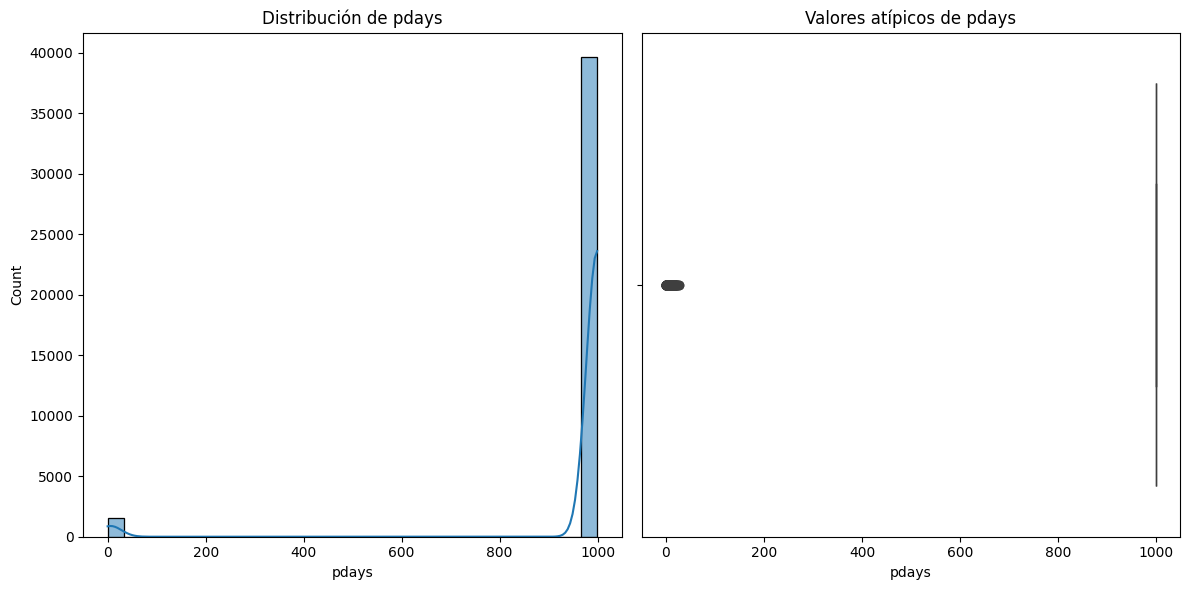

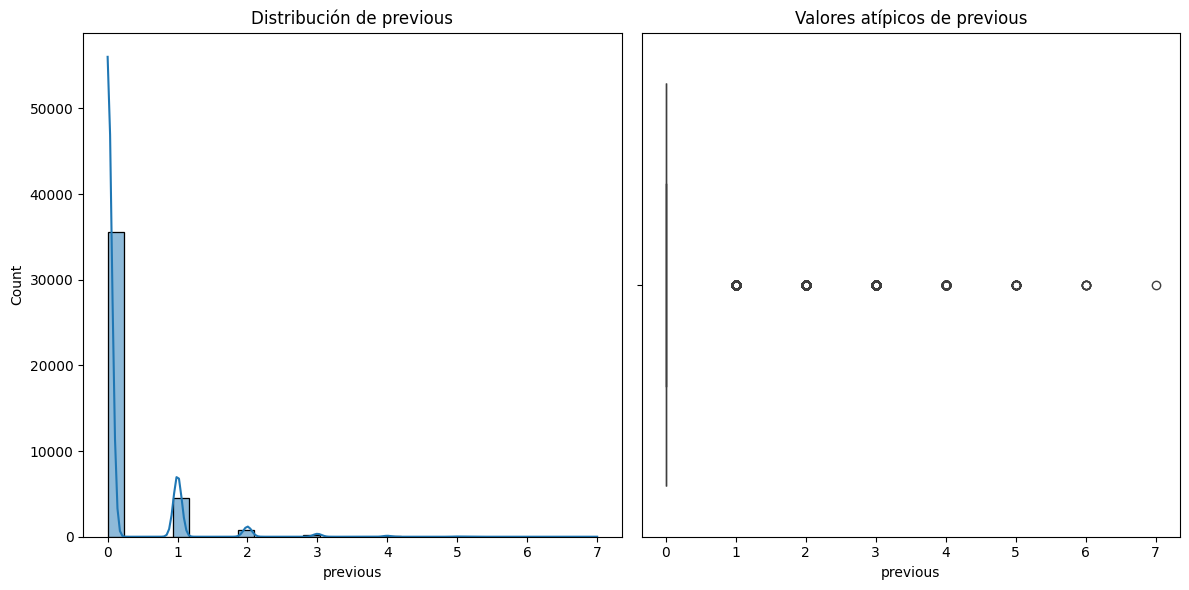

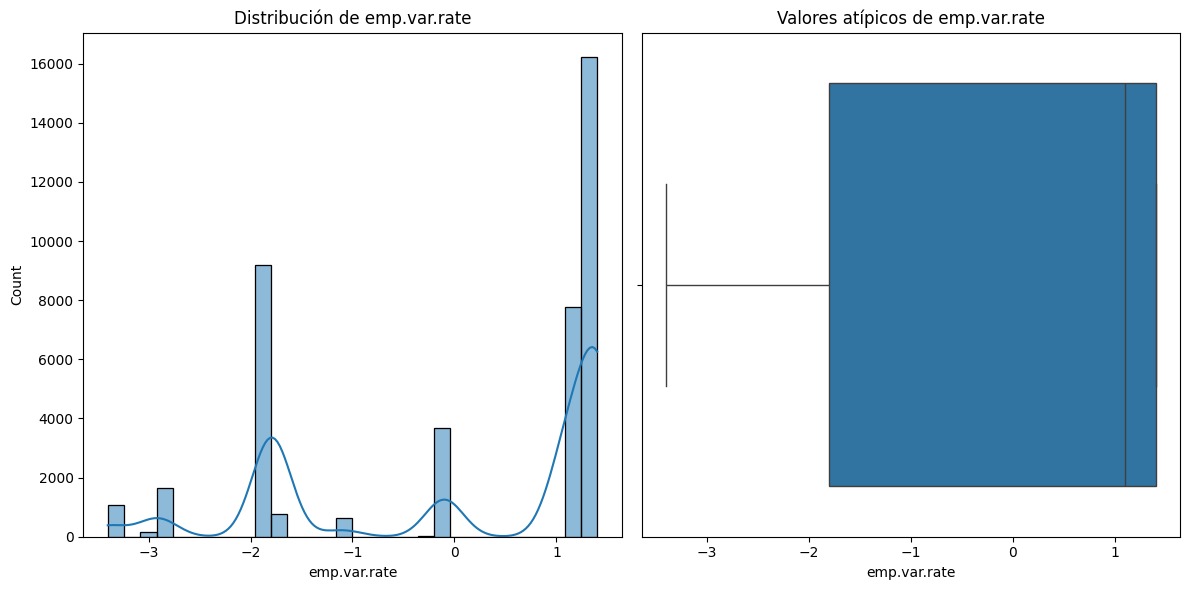

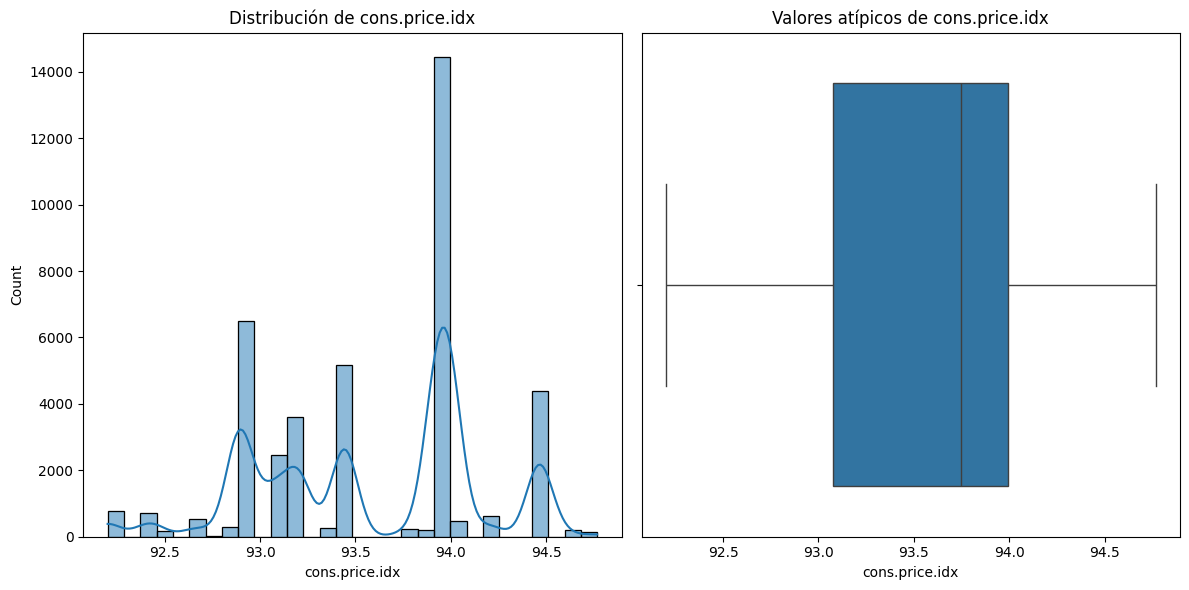

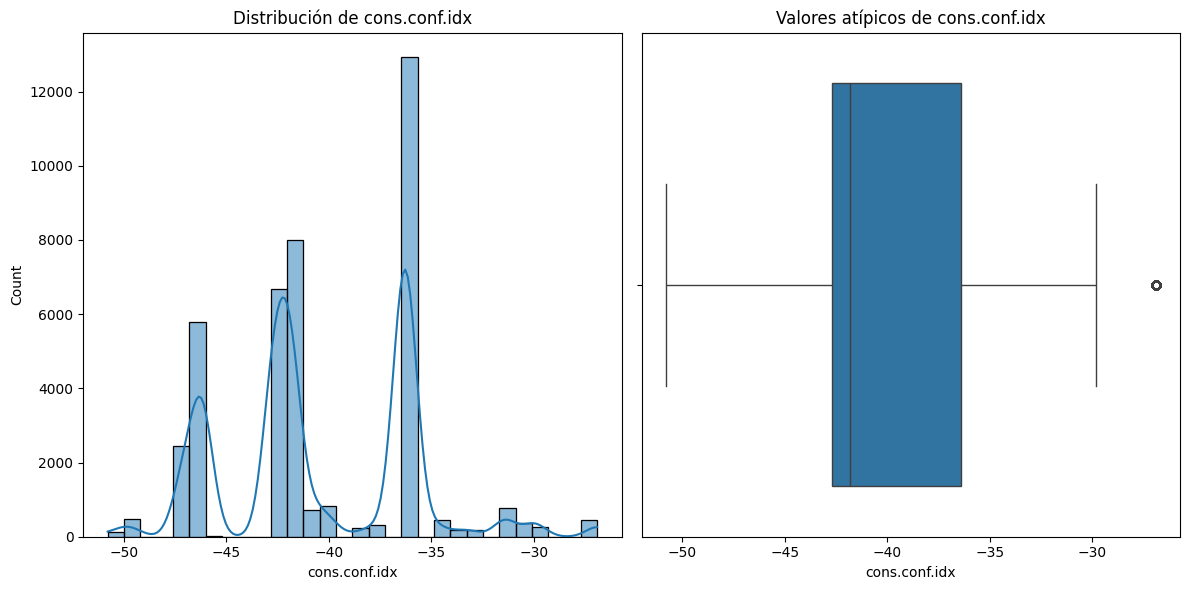

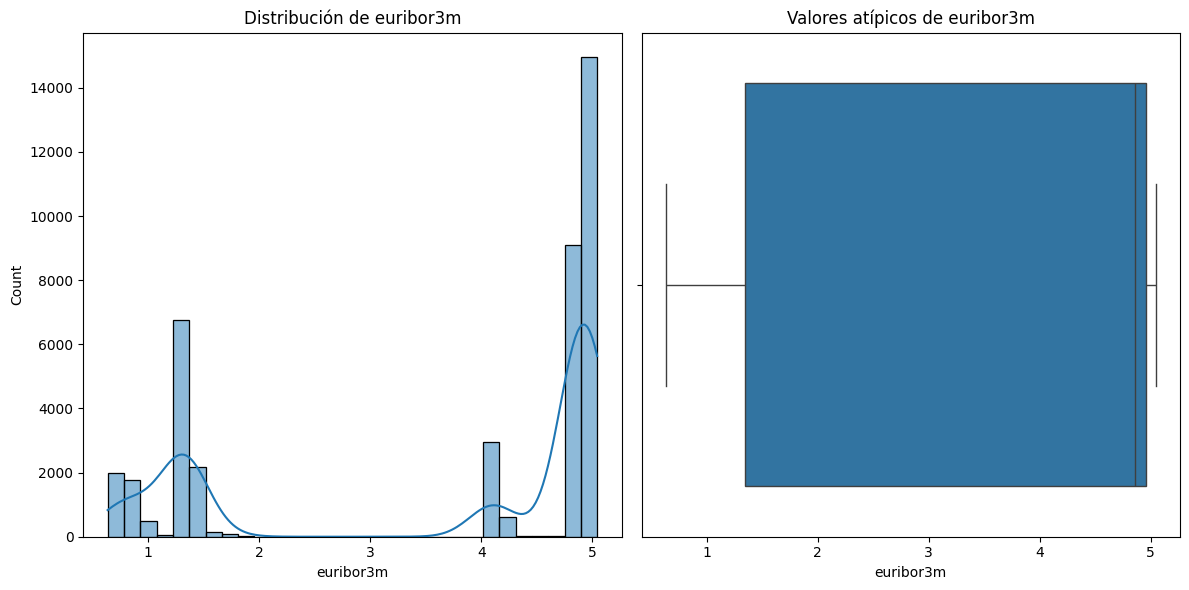

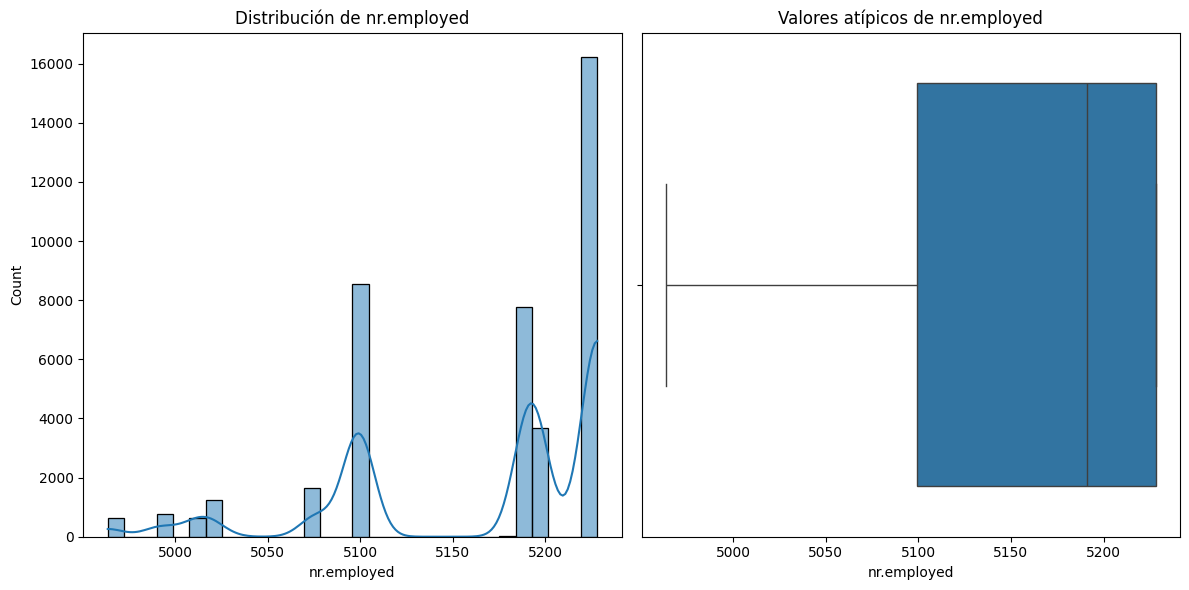

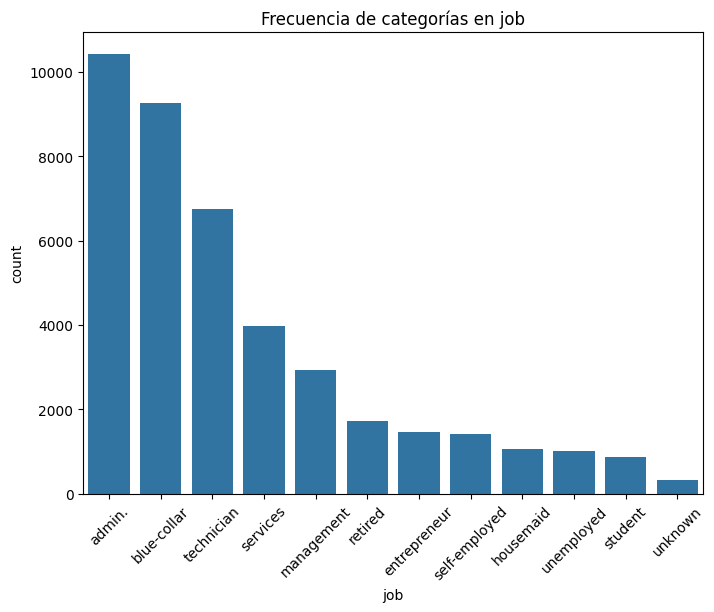

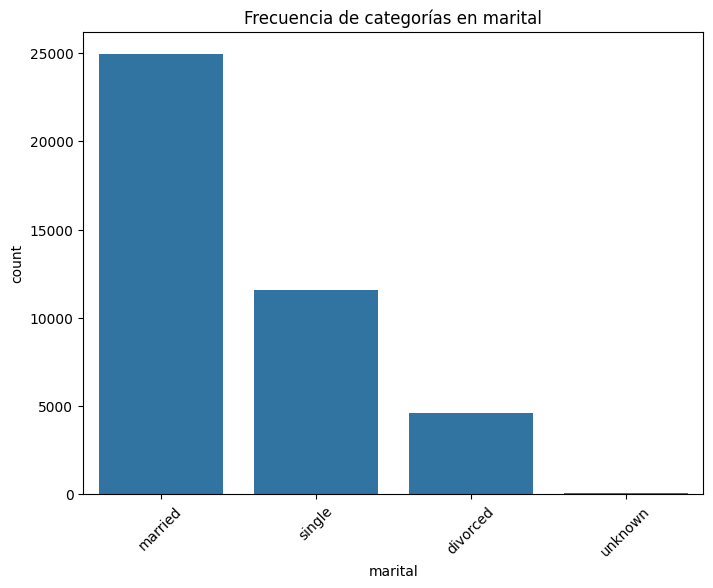

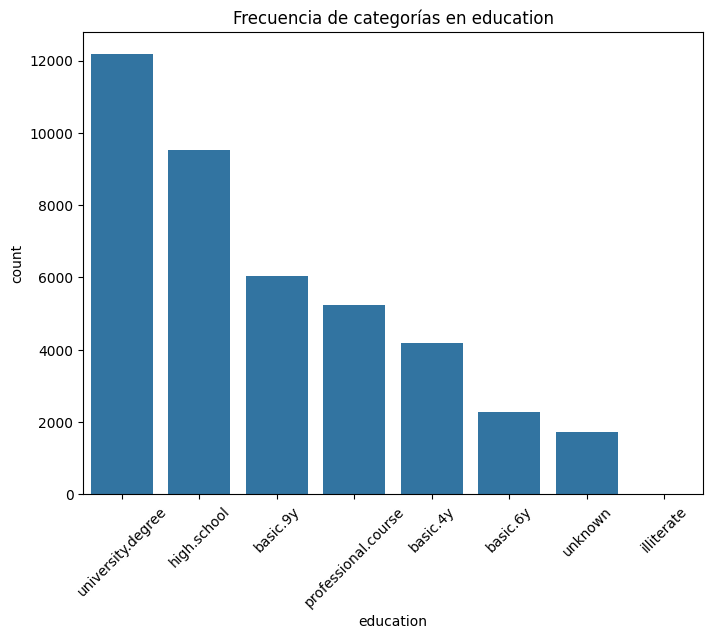

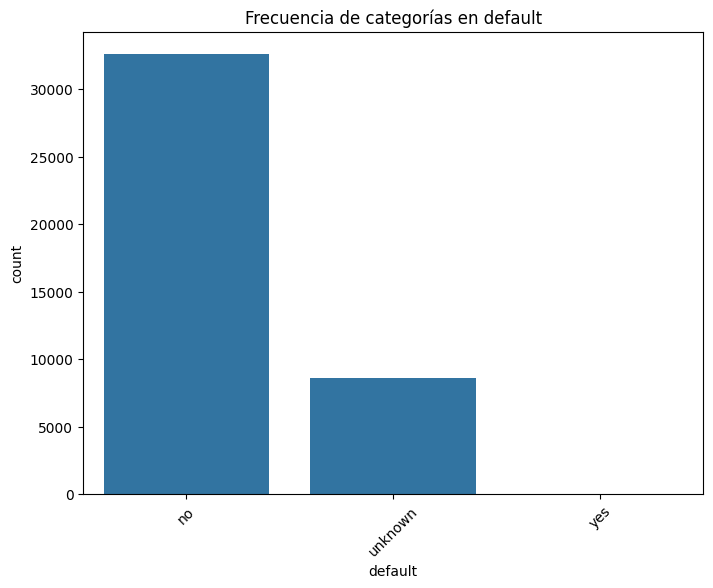

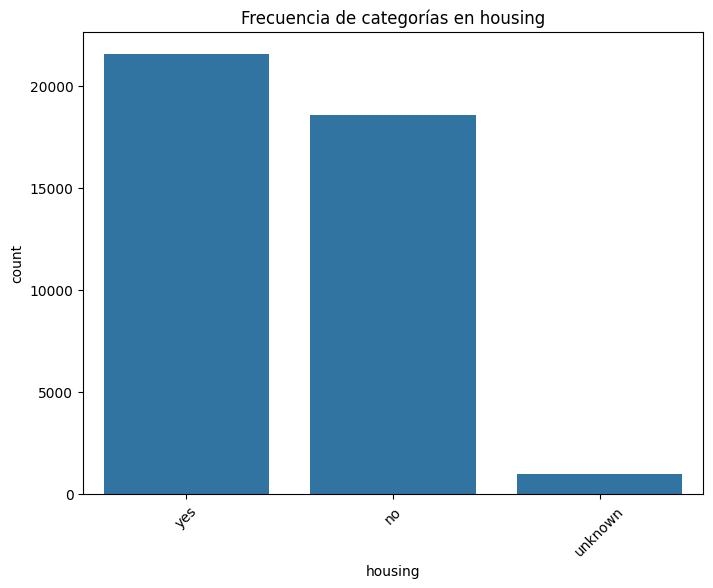

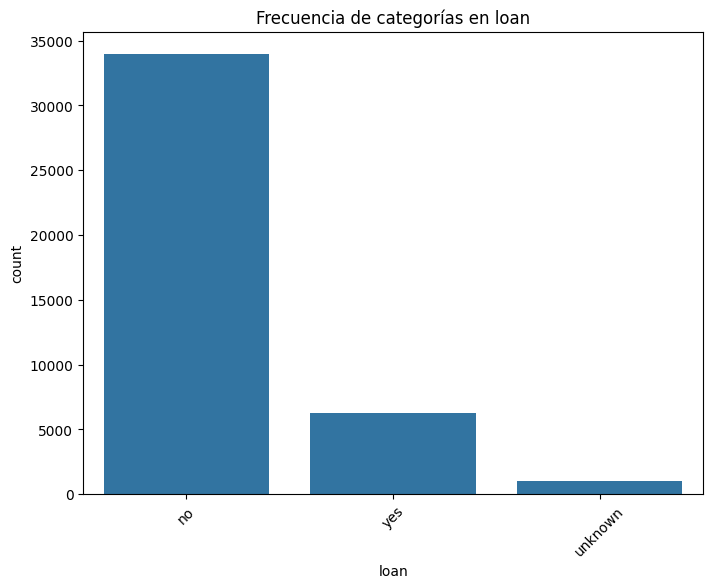

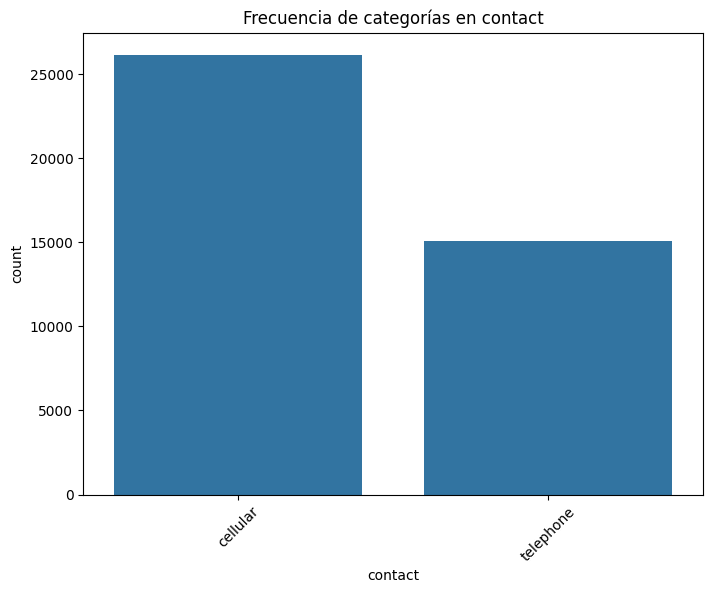

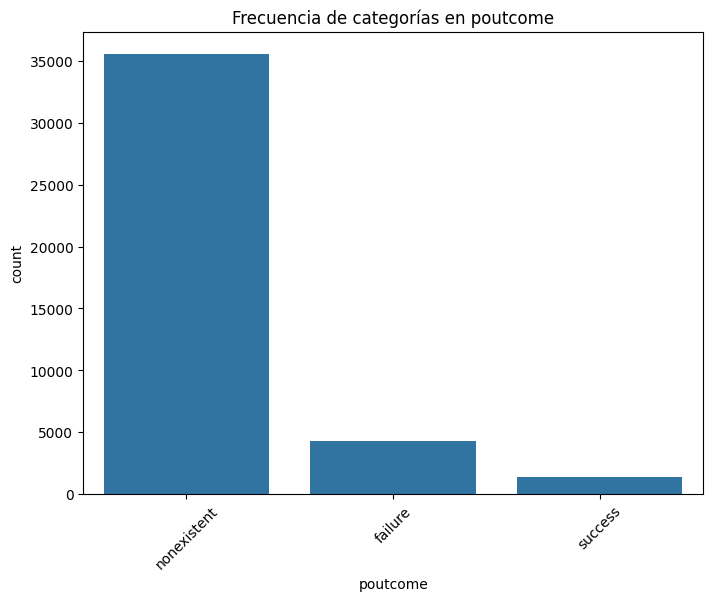

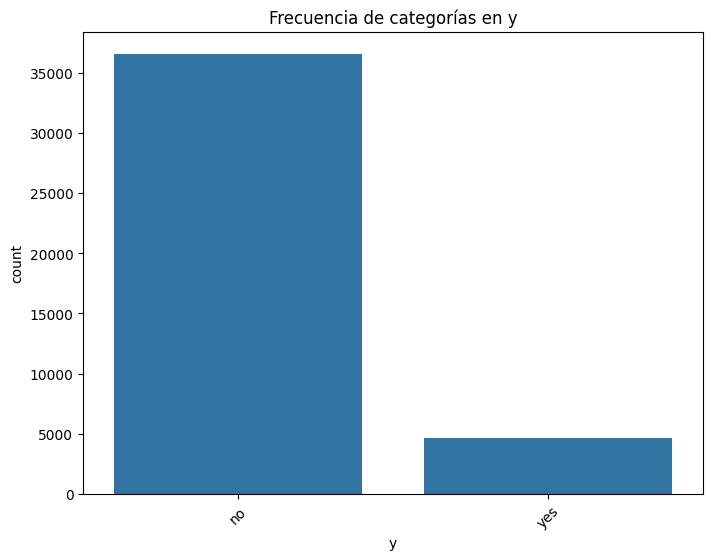

<Figure size 1200x800 with 0 Axes>

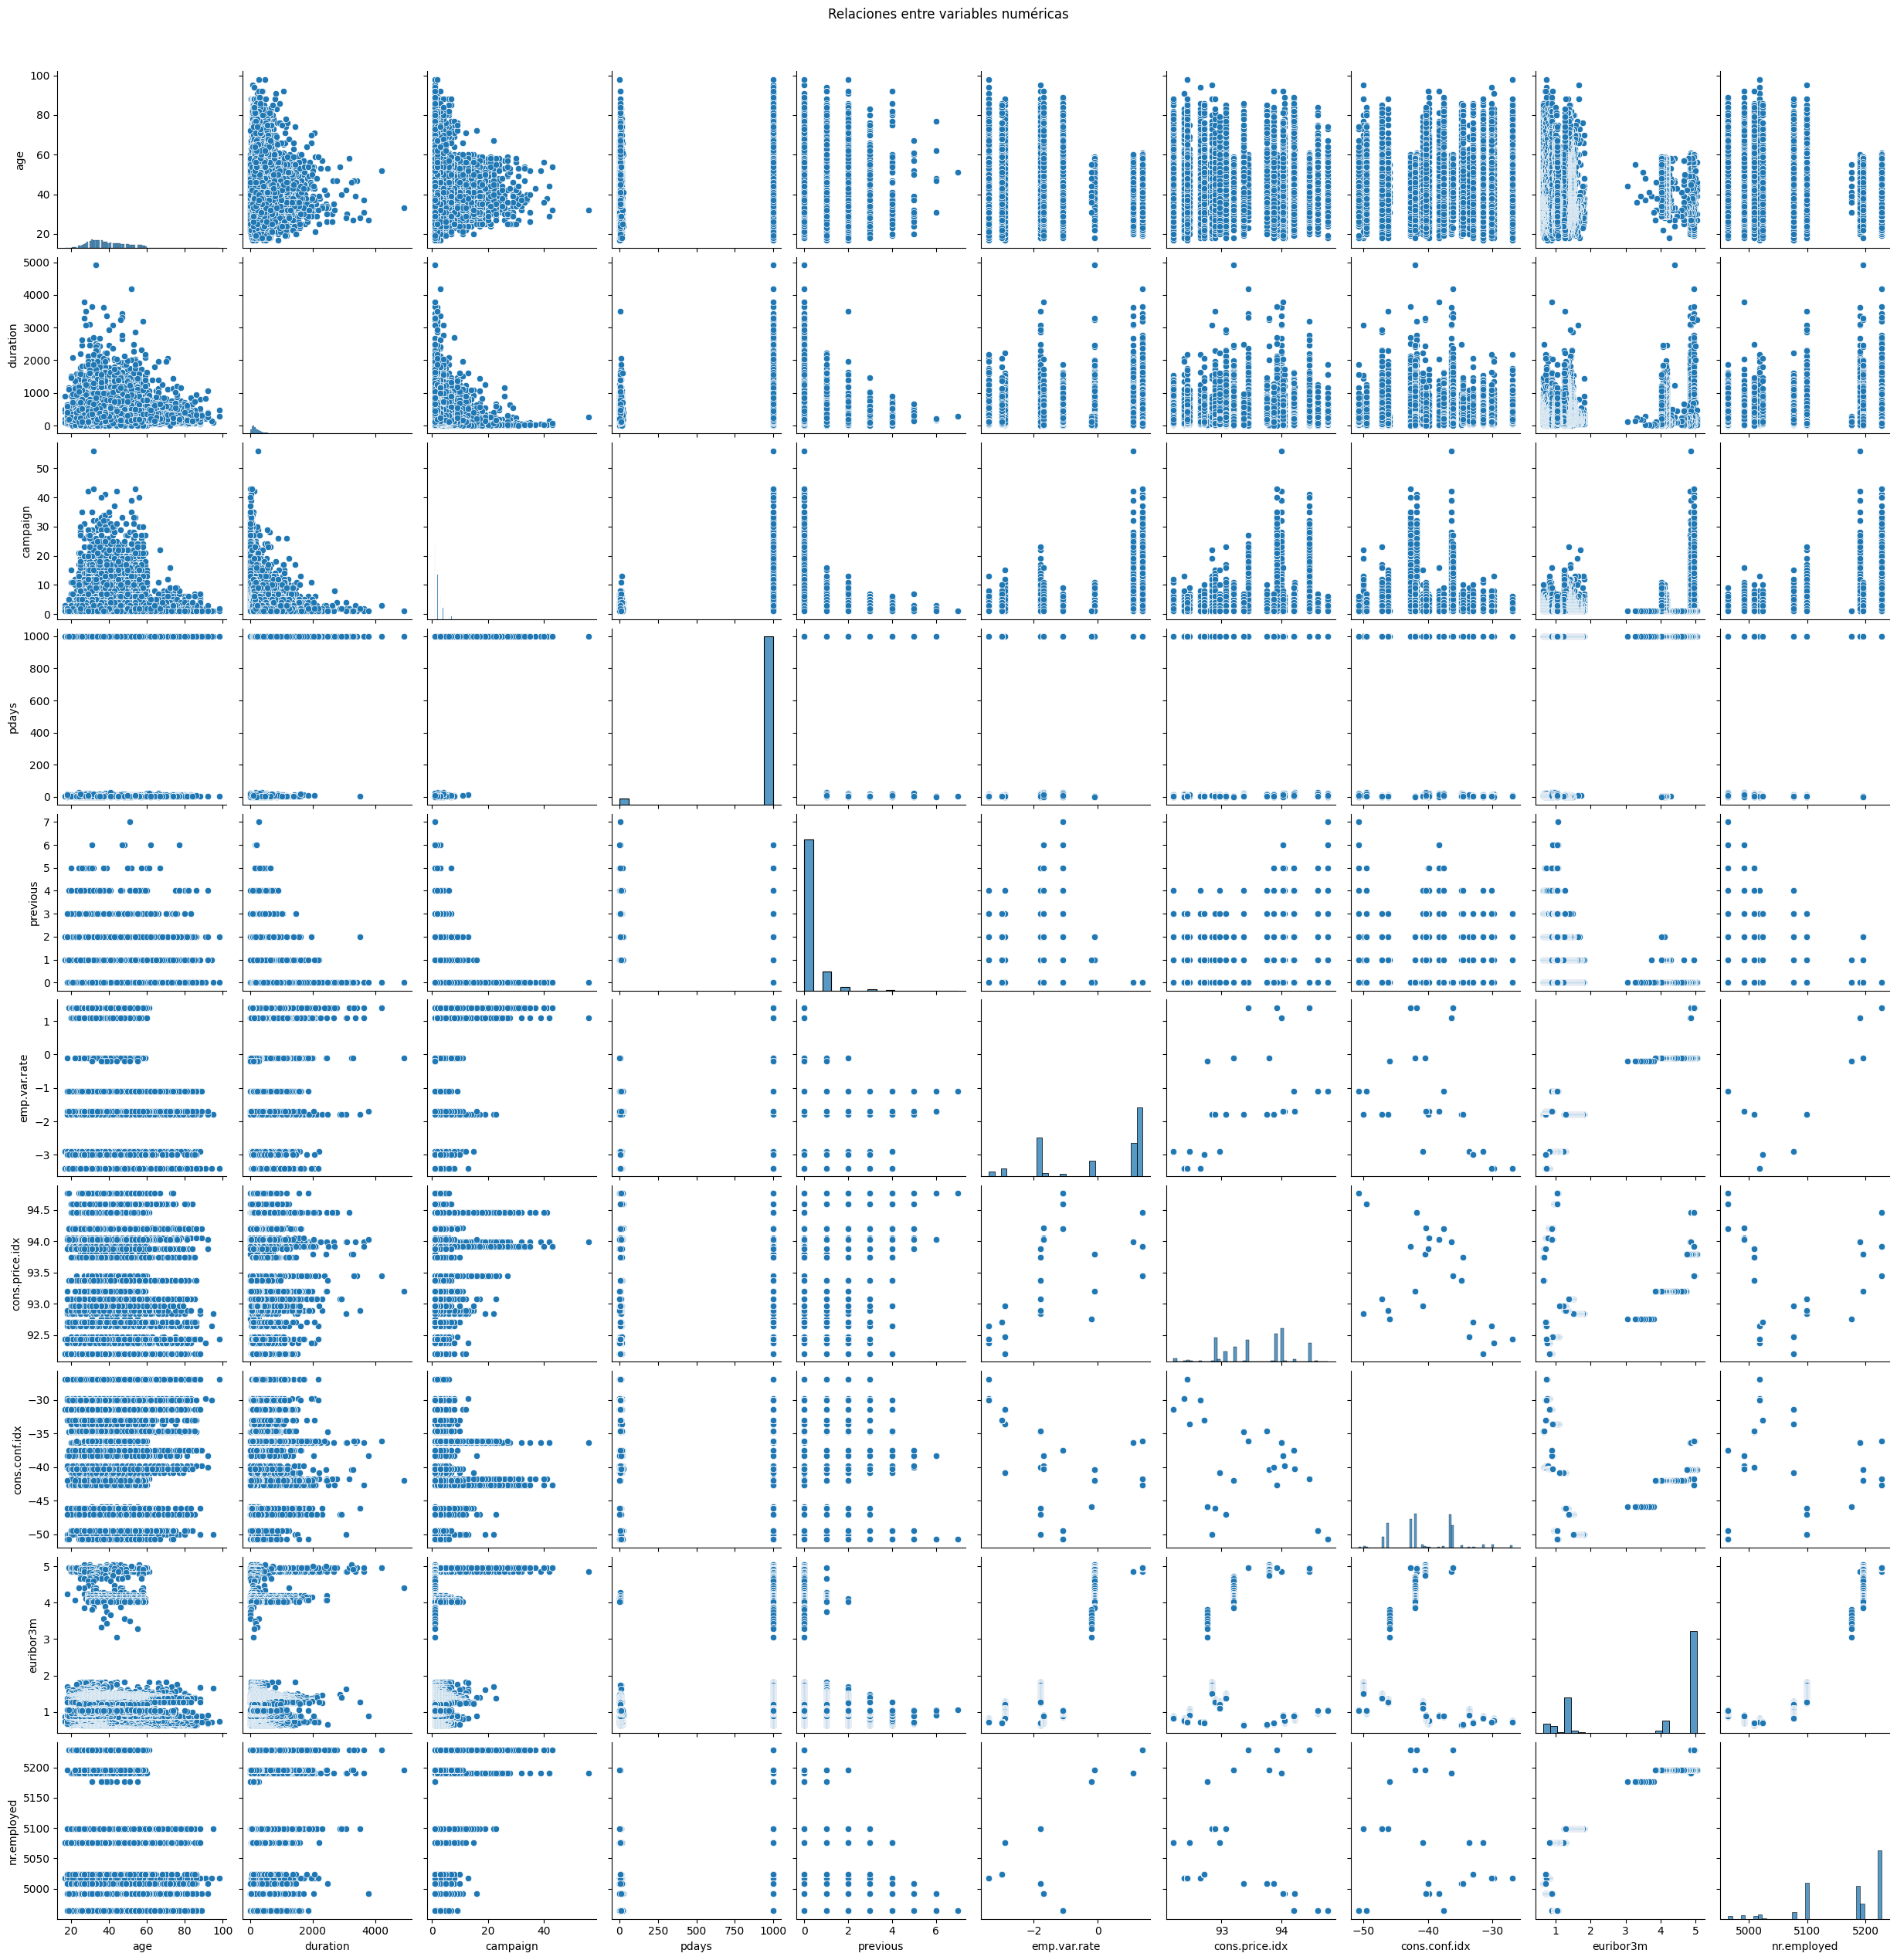

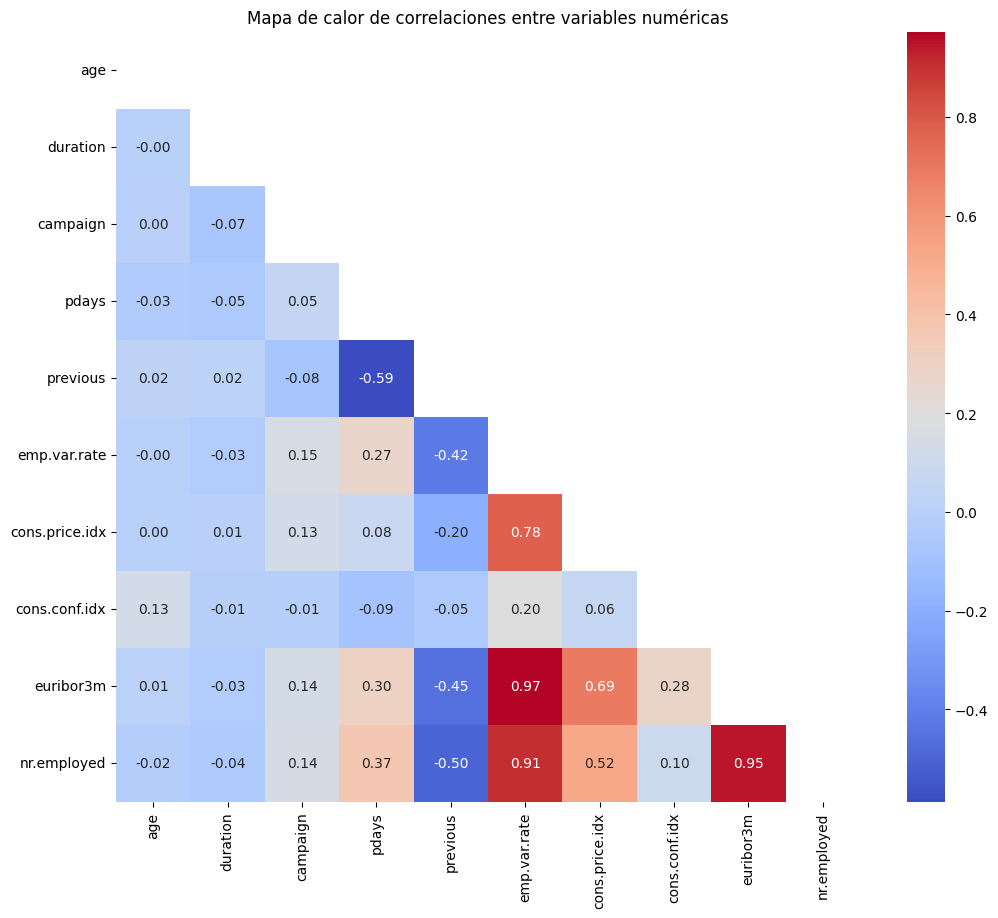

In [8]:
# Visualización de variables numéricas
variables_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

# Crear gráficos de histogramas y diagramas de caja
for columna in variables_numericas:
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(datos[columna], bins=30, kde=True)
    plt.title(f"Distribución de {columna}")

    # Diagrama de caja
    plt.subplot(1, 2, 2)
    sns.boxplot(x=datos[columna])
    plt.title(f"Valores atípicos de {columna}")

    plt.tight_layout()
    plt.show()

# Visualización de variables categóricas
variables_categoricas = datos.select_dtypes(include=['object']).columns

# Crear gráficos de conteo para cada variable categórica
for columna in variables_categoricas:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=datos, x=columna, order=datos[columna].value_counts().index)
    plt.title(f"Frecuencia de categorías en {columna}")
    plt.xticks(rotation=45)
    plt.show()

# Análisis de Variables Numéricas
# Pairplot para evaluar relaciones entre las variables numéricas
plt.figure(figsize=(12, 8))
sns.pairplot(datos[variables_numericas])
plt.suptitle("Relaciones entre variables numéricas", y=1.02)
plt.show()

# Mapa de calor para observar correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(datos[variables_numericas].corr(), annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(datos[variables_numericas].corr()))
plt.title("Mapa de calor de correlaciones entre variables numéricas")
plt.show()



Distribución de la variable objetivo (y):
y
no     36548
yes     4640
Name: count, dtype: int64
Conclusión: Existe un desbalance significativo entre las clases 'no' y 'yes'.
Análisis de valores atípicos en duration:
 - 2963 valores atípicos detectados.
 - Ejemplo de valores atípicos: [1666, 787, 812, 1575, 1042]
Análisis de valores atípicos en campaign:
 - 2406 valores atípicos detectados.
 - Ejemplo de valores atípicos: [7, 8, 8, 7, 7]
Análisis de valores atípicos en pdays:
 - 1515 valores atípicos detectados.
 - Ejemplo de valores atípicos: [6, 4, 4, 3, 4]
Análisis de valores atípicos en previous:
 - 5625 valores atípicos detectados.
 - Ejemplo de valores atípicos: [1, 1, 1, 1, 1]

Mapa de correlaciones entre variables numéricas:


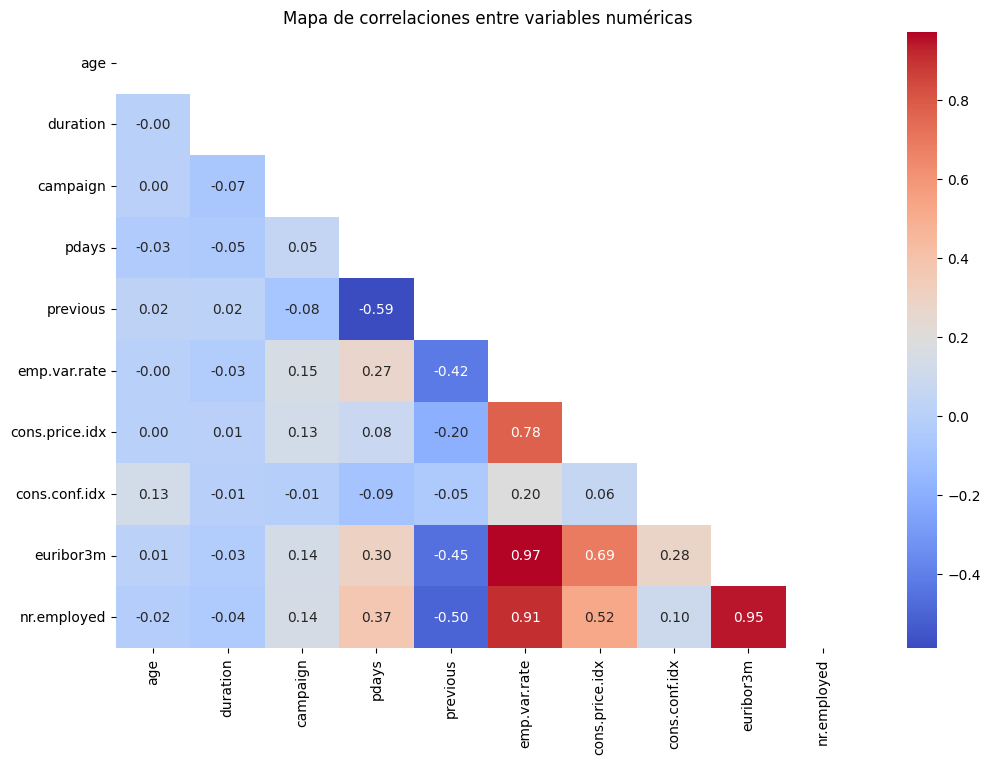


Correlaciones fuertes detectadas:
                emp.var.rate  cons.price.idx  euribor3m  nr.employed
emp.var.rate             NaN        0.775334   0.972245     0.906970
cons.price.idx      0.775334             NaN        NaN          NaN
euribor3m           0.972245             NaN        NaN     0.945154
nr.employed         0.906970             NaN   0.945154          NaN

Frecuencia de categorías:

job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                417

In [9]:
# Conclusiones del EDA

# Conclusión 1: Desbalance en la variable objetivo
y_balance = datos['y'].value_counts()
print("Distribución de la variable objetivo (y):")
print(y_balance)
if y_balance['no'] / y_balance['yes'] > 5:
    print("Conclusión: Existe un desbalance significativo entre las clases 'no' y 'yes'.")

# Conclusión 2: Variables numéricas con valores atípicos
variables_con_outliers = ['duration', 'campaign', 'pdays', 'previous']
for variable in variables_con_outliers:
    print(f"Análisis de valores atípicos en {variable}:")
    q1 = datos[variable].quantile(0.25)
    q3 = datos[variable].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    outliers = datos[(datos[variable] < lower_limit) | (datos[variable] > upper_limit)][variable]
    print(f" - {len(outliers)} valores atípicos detectados.")
    if len(outliers) > 0:
        print(f" - Ejemplo de valores atípicos: {outliers.iloc[:5].to_list()}")

# Conclusión 3: Correlaciones
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("\nMapa de correlaciones entre variables numéricas:")
correlacion = datos[variables_numericas].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", mask=np.triu(correlacion))
plt.title("Mapa de correlaciones entre variables numéricas")
plt.show()

# Identificar correlaciones fuertes (> 0.7)
correlaciones_fuertes = correlacion[(correlacion.abs() > 0.7) & (correlacion.abs() < 1.0)]
print("\nCorrelaciones fuertes detectadas:")
print(correlaciones_fuertes.dropna(how="all", axis=0).dropna(how="all", axis=1))

# Conclusión 4: Análisis de las variables categóricas
print("\nFrecuencia de categorías:")
for columna in variables_categoricas:
    print(f"\n{columna}:")
    print(datos[columna].value_counts())


### Modelo de regresión logística

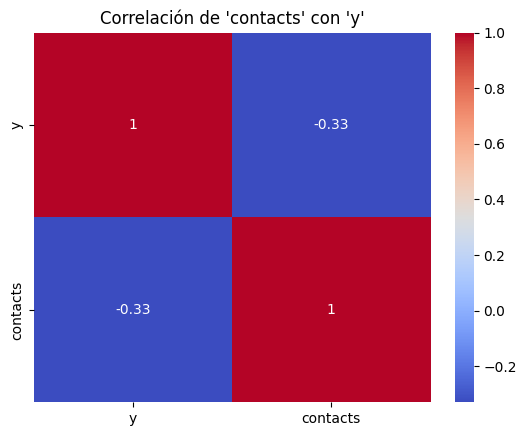

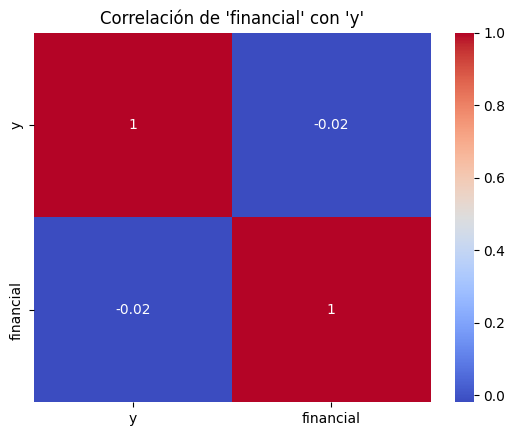

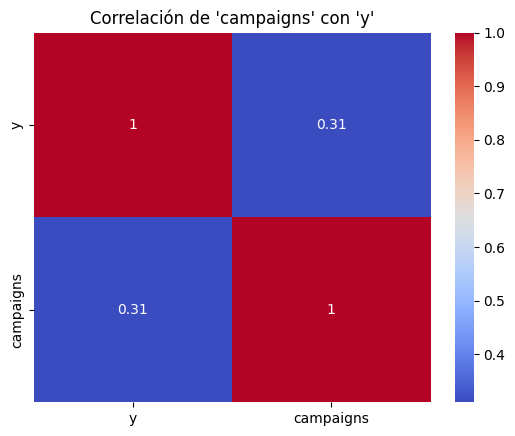

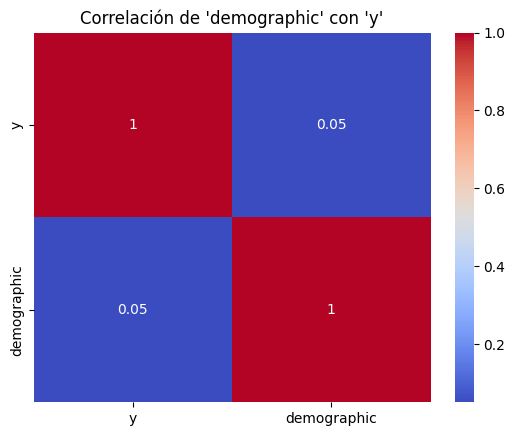

,contact,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacts,financial,campaigns,demographic
0,telephone,261,1.1,93.994,-36.4,4.857,5191.0,0,1000,0,1,60
1,telephone,149,1.1,93.994,-36.4,4.857,5191.0,0,1000,1,1,68
2,telephone,226,1.1,93.994,-36.4,4.857,5191.0,0,1000,2,1,48


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Ruta al archivo
ruta_datos = '/workspaces/myfirstML/data/raw/bank-marketing-campaign-data.csv'
datos = pd.read_csv(ruta_datos, delimiter=';')

# Eliminar las columnas 'month' y 'day_of_week'
if 'month' in datos.columns and 'day_of_week' in datos.columns:
    datos.drop(columns=['month', 'day_of_week'], axis=1, inplace=True)


# Asegurarse de que todas las columnas categóricas estén codificadas como numéricas
encoder = LabelEncoder()
columnas_categoricas = ['y', 'housing', 'loan', 'default', 'poutcome']
for col in columnas_categoricas:
    datos[col] = encoder.fit_transform(datos[col])

# Contactos históricos: suma de las características 'campaign', 'previous' y 'pdays'
contact_features = datos[['campaign', 'previous', 'pdays']]
datos['contacts'] = contact_features.sum(axis=1)

# Visualización de la correlación con la variable objetivo
contact_f = datos[['y', 'contacts']]
sns.heatmap(contact_f.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlación de 'contacts' con 'y'")
plt.show()

# Perfil financiero: suma de las características 'housing', 'loan' y 'default'
financial_features = datos[['housing', 'loan', 'default']]
datos['financial'] = financial_features.sum(axis=1)

# Visualización de la correlación con la variable objetivo
financial_f = datos[['y', 'financial']]
sns.heatmap(financial_f.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlación de 'financial' con 'y'")
plt.show()

# Resultados de campañas anteriores: combinación de 'poutcome' y 'previous'
campaign_features = datos[['poutcome', 'previous']]
datos['campaigns'] = campaign_features.sum(axis=1)

# Visualización de la correlación con la variable objetivo
campaign_f = datos[['y', 'campaigns']]
sns.heatmap(campaign_f.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlación de 'campaigns' con 'y'")
plt.show()

# Perfil demográfico: combinación de 'age', 'job', 'marital' y 'education'
# Asegurarse de que estas columnas también estén codificadas si es necesario
columnas_demograficas = ['job', 'marital', 'education']
for col in columnas_demograficas:
    datos[col] = encoder.fit_transform(datos[col])

demographic_features = datos[['age', 'job', 'marital', 'education']]
datos['demographic'] = demographic_features.sum(axis=1)

# Visualización de la correlación con la variable objetivo
demographic_f = datos[['y', 'demographic']]
sns.heatmap(demographic_f.corr().round(2), annot=True, cmap='coolwarm')
plt.title("Correlación de 'demographic' con 'y'")
plt.show()

# Eliminamos las columnas originales usadas para crear estas características
datos.drop(columns=['campaign', 'previous', 'pdays', 'housing', 'loan', 'default', 
                    'poutcome', 'age', 'job', 'marital', 'education'], inplace=True)

# Verificar las primeras filas del DataFrame actualizado
datos.head(3)



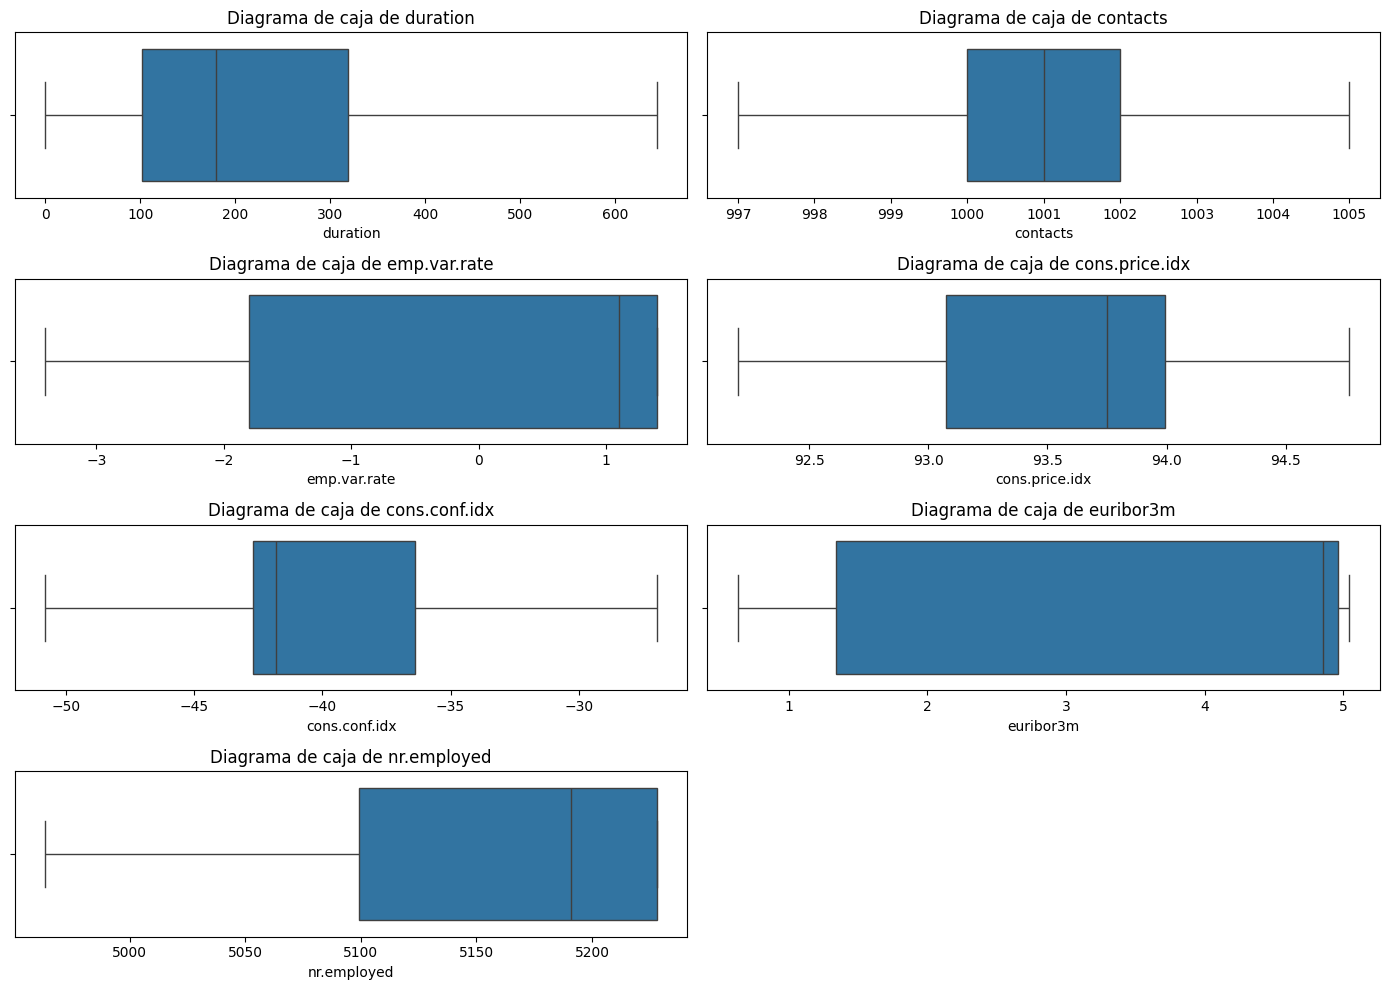

,duration,contacts,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,235.00,1001.24,0.08,93.58,-40.50,3.62,5167.04
std,177.35,1.74,1.57,0.58,4.63,1.73,72.25
min,0.00,997.00,-3.40,92.20,-50.80,0.63,4963.60
25%,102.00,1000.00,-1.80,93.08,-42.70,1.34,5099.10
50%,180.00,1001.00,1.10,93.75,-41.80,4.86,5191.00
75%,319.00,1002.00,1.40,93.99,-36.40,4.96,5228.10
max,644.50,1005.00,1.40,94.77,-26.95,5.04,5228.10


In [13]:
# Análisis de valores atípicos: Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las características continuas
caracteristicas_continuas = ['duration', 'contacts', 'emp.var.rate', 
                             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Crear diagramas de caja
plt.figure(figsize=(14, 10))
for i, columna in enumerate(caracteristicas_continuas):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=datos[columna])
    plt.title(f"Diagrama de caja de {columna}")
plt.tight_layout()
plt.show()

# Análisis de valores atípicos: Ajuste
import json

# Función para calcular y ajustar valores atípicos
def ajustar_outliers(df, columna, permitir_negativos=True):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr) if permitir_negativos else max(0, q1 - (1.5 * iqr))
    
    # Ajustar los valores fuera de los límites
    df[columna] = df[columna].apply(lambda x: min(max(x, limite_inferior), limite_superior))
    
    # Guardar límites en un archivo JSON
    archivo_json = f'outliers_{columna}.json'
    with open(archivo_json, 'w') as f:
        json.dump({'limite_superior': limite_superior, 'limite_inferior': limite_inferior}, f)

# Aplicar la función a las características continuas
caracteristicas_ajustar_negativos = ['cons.conf.idx']
caracteristicas_ajustar_positivos = ['duration', 'contacts']

for columna in caracteristicas_ajustar_negativos:
    ajustar_outliers(datos, columna, permitir_negativos=True)

for columna in caracteristicas_ajustar_positivos:
    ajustar_outliers(datos, columna, permitir_negativos=False)

# Verificar los datos
datos[caracteristicas_continuas].describe().round(2)


Valores faltantes por columna:
Series([], dtype: int64)


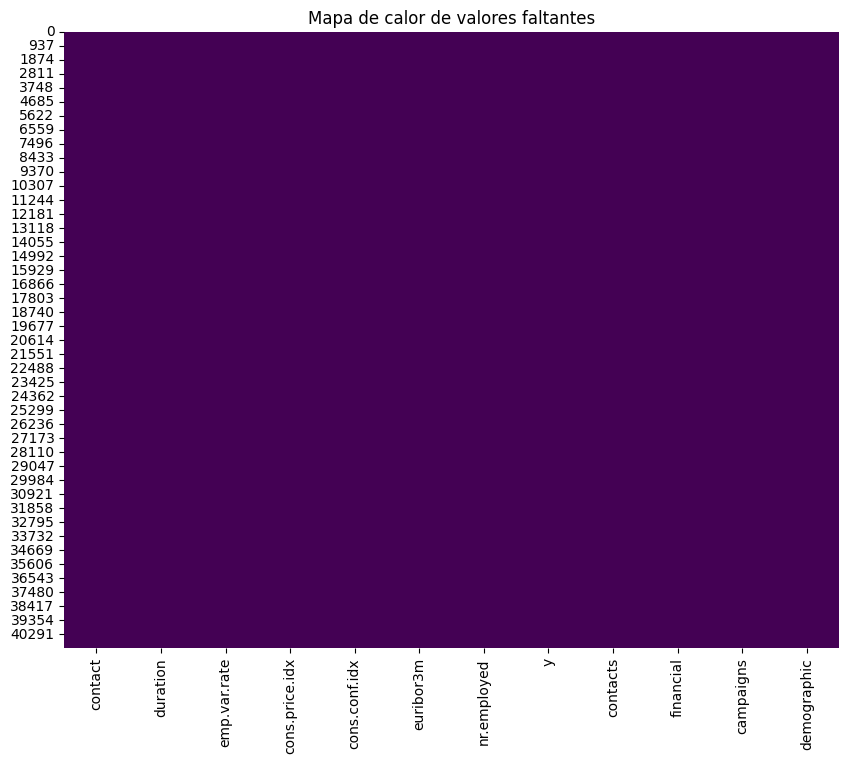

No hay valores faltantes en el conjunto de datos. Procedemos al siguiente paso.


In [15]:

# Verificar si hay valores faltantes
valores_faltantes = datos.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])

# Visualización de valores faltantes en un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(datos.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

# Si no hay valores faltantes, imprimir mensaje y continuar
if valores_faltantes.sum() == 0:
    print("No hay valores faltantes en el conjunto de datos. Procedemos al siguiente paso.")
else:
    # Estrategia para manejar valores faltantes
    # Por ejemplo, imputar valores faltantes con la mediana para variables continuas
    columnas_faltantes = valores_faltantes[valores_faltantes > 0].index
    for columna in columnas_faltantes:
        if datos[columna].dtype in ['int64', 'float64']:
            datos[columna].fillna(datos[columna].median(), inplace=True)
        else:
            datos[columna].fillna(datos[columna].mode()[0], inplace=True)

    print("Se imputaron los valores faltantes con mediana/moda según el tipo de dato.")


In [17]:
from sklearn.model_selection import train_test_split

# Entrenamiento y Prueba
# Función para dividir los datos
def dividir_datos(target, df, test_size=0.2, random_state=123):
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Dividir el conjunto original
X_train_with_outliers, X_test_with_outliers, y_train, y_test = dividir_datos('y', datos)

# Guardar los conjuntos divididos en archivos CSV para su reutilización
X_train_with_outliers.to_csv('X_train_with_outliers.csv', index=False)
X_test_with_outliers.to_csv('X_test_with_outliers.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Conjuntos de entrenamiento y prueba creados y guardados correctamente.")


Conjuntos de entrenamiento y prueba creados y guardados correctamente.


In [19]:
# Asegurar que todas las columnas categóricas estén codificadas numéricamente
columnas_categoricas = X_train_with_outliers.select_dtypes(include=['object']).columns

# Codificación con LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in columnas_categoricas:
    X_train_with_outliers[col] = encoder.fit_transform(X_train_with_outliers[col])
    X_test_with_outliers[col] = encoder.transform(X_test_with_outliers[col])


# Normalización
X_train_with_outliers_norm, X_test_with_outliers_norm = normalizar(X_train_with_outliers, X_test_with_outliers, 'with_outliers')

# Min-Max Scaling
X_train_with_outliers_minmax, X_test_with_outliers_minmax = min_max_scaling(X_train_with_outliers, X_test_with_outliers, 'with_outliers')

# Guardar conjuntos escalados
X_train_with_outliers_norm.to_csv('X_train_with_outliers_norm.csv', index=False)
X_test_with_outliers_norm.to_csv('X_test_with_outliers_norm.csv', index=False)
X_train_with_outliers_minmax.to_csv('X_train_with_outliers_minmax.csv', index=False)
X_test_with_outliers_minmax.to_csv('X_test_with_outliers_minmax.csv', index=False)

print("Datos normalizados y escalados con éxito.")



Datos normalizados y escalados con éxito.


### Optimizar el modelo

Precisión en el conjunto de prueba: 0.9102937606215101

Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7298
          Sí       0.68      0.40      0.51       940

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



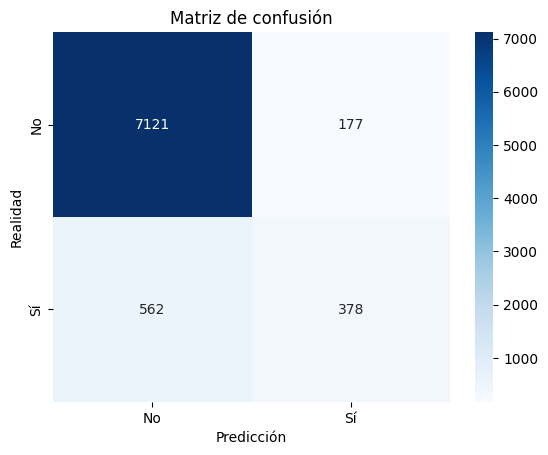

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Mejores parámetros encontrados por GridSearchCV:
{'C': np.float64(0.03359818286283781), 'penalty': 'l2', 'solver': 'saga'}

Precisión del modelo optimizado en el conjunto de prueba: 0.9106579266812334

Reporte de clasificación:
              precision    recall  f1-score   support

          No       0.93      0.98      0.95      7298
          Sí       0.68      0.40      0.51       940

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



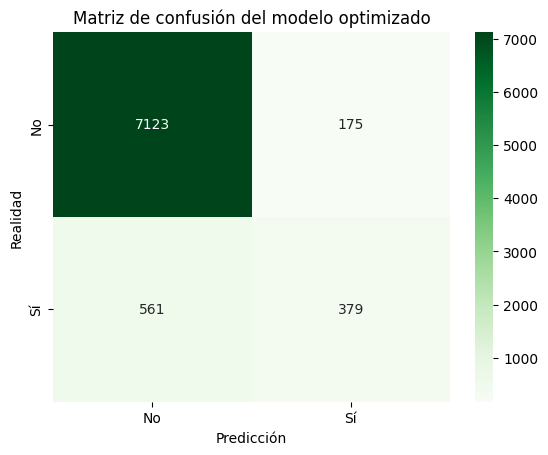

Modelo optimizado guardado con éxito.


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import pickle

# Crear una instancia del modelo de Regresión Logística
modelo = LogisticRegression(random_state=123, max_iter=500)

# Entrenar el modelo con el conjunto de entrenamiento normalizado
modelo.fit(X_train_with_outliers_norm, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_with_outliers_norm)

# Evaluar el modelo
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["No", "Sí"]))

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Guardar el modelo entrenado
with open('modelo_regresion_logistica.sav', 'wb') as archivo:
    pickle.dump(modelo, archivo)

# Definir hiperparámetros para la búsqueda
parametros = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'saga']
}

# Realizar GridSearchCV
grid_search = GridSearchCV(LogisticRegression(random_state=123, max_iter=500), 
                           param_grid=parametros, 
                           scoring='accuracy', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Entrenar el modelo optimizado
grid_search.fit(X_train_with_outliers_norm, y_train)

# Obtener los mejores parámetros
mejores_parametros = grid_search.best_params_
print("Mejores parámetros encontrados por GridSearchCV:")
print(mejores_parametros)

# Evaluar el modelo optimizado en el conjunto de prueba
y_pred_optimizado = grid_search.best_estimator_.predict(X_test_with_outliers_norm)

print("\nPrecisión del modelo optimizado en el conjunto de prueba:", accuracy_score(y_test, y_pred_optimizado))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_optimizado, target_names=["No", "Sí"]))

# Matriz de confusión del modelo optimizado
matriz_confusion_optimizada = confusion_matrix(y_test, y_pred_optimizado)
sns.heatmap(matriz_confusion_optimizada, annot=True, fmt='d', cmap='Greens', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.title("Matriz de confusión del modelo optimizado")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

# Guardar el modelo optimizado
with open('modelo_regresion_logistica_optimizado.sav', 'wb') as archivo:
    pickle.dump(grid_search.best_estimator_, archivo)

print("Modelo optimizado guardado con éxito.")